In [18]:
using LinearAlgebra
#using NLsolve
import Pkg; Pkg.add("OrdinaryDiffEq")
import Pkg; Pkg.add("Symbolics")
import Pkg; Pkg.add("StaticArrays")
using OrdinaryDiffEq
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [90137ffa] + StaticArrays v1.9.13
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [10]:
run(`git clone https://github.com/pabloemontes/Conformal-3D.git`)


Cloning into 'Conformal-3D'...


Process(`git clone https://github.com/pabloemontes/Conformal-3D.git`, ProcessExited(0))

In [19]:

debug = false;
const D = 4
directory = "Conformal-3D/"
include(directory*"flux-and-jacobian-functions.jl")
include(directory*"inversion.jl")
include(directory*"flux-functions.jl")
include(directory*"initial-data.jl")
include(directory*"choques_utils.jl")
include(directory*"auxfunctions.jl")
include(directory*"parameters_creator.jl")#Load important packages

parameters_creator (generic function with 1 method)

## Christoffel Symbols

We have the equations

\begin{equation}
    \begin{matrix}
        \nabla_{a}T^{ab}&=&0\\
        \nabla_{a}A^{abc}&=&I^{bc}
    \end{matrix}
\end{equation}

We can rewrite this as

\begin{equation}
    \begin{matrix}
        \partial_{a}T^{ab} + \Gamma^{b}_{ad}T^{ad} + \Gamma^{a}_{ad}T^{db}&=&0\\
        \partial_{a}A^{abc} + \Gamma^{a}_{ad}A^{dbc} + \Gamma^{b}_{ad}A^{adc} + \Gamma^{c}_{ad}A^{abd} &=&I^{bc}
    \end{matrix}
\end{equation}

For example

\begin{equation}
    \begin{matrix}
        \partial_{t}T^{t0} + \Gamma^{0}_{td}T^{td} + \Gamma^{t}_{td}T^{d0} =\\ - (\partial_{x}T^{x0} + \Gamma^{0}_{xd}T^{xd} + \Gamma^{x}_{xd}T^{d0} + \partial_{z}T^{z0} + \Gamma^{0}_{zd}T^{zd} + \Gamma^{z}_{zd}T^{d0})
    \end{matrix}
\end{equation}



In [20]:
#initial_data_type = :constant_mu
initial_data_type = :chichon_3D
#Grid parameters
N_out = 40
M_out = 40
O_out = 40
const N_Fields_out = 14
Lx_out = 20.0
Ly_out = 20.0
Lz_out = 20.0

lengthpars_out = (Lx_out, Ly_out, Lz_out, N_out, M_out, O_out, N_Fields_out)

(20.0, 20.0, 20.0, 40, 40, 40, 14)

In [21]:
get_pos(N_out+3,N_out/2+4,N_out+3, lengthpars_out)

(10.0, 0.2564102564102573, 10.0)

In [22]:
println("hola")

hola


In [40]:
#initial data vector
initial_data = ones(N_out+6,M_out+6, O_out+6,2*N_Fields_out);


C0_out = 1
C1_out = 10
C2_out = 100

χ_out = (1.0, 1.0)
C_out = (C0_out, C1_out, C2_out)

tol_out = 1e-15
iter_max_out = 10

Mass = 0.0
a = 0.0
println("hola")

par_inidat, par_source, par_flux, par_inv, par_ev = parameters_creator(χ_out, C_out, lengthpars_out, tol_out, iter_max_out, Mass, a)

gtable = par_inv[end];
Γtable = par_source[end];


hola
creating metric
metric created
creating christoffels
christoffels created
I am in parameters creator
hello!
I get here!


In [41]:
include(directory*"initial-data.jl")

create_initial_data (generic function with 1 method)

In [42]:
include(directory*"metric-creator.jl")
include(directory*"initial-data.jl")
println(directory*"Starting Dissipative Run...")
#initial_data_type = :constant_mu
dx = Lx_out/N_out
dt = dx*0.1

tf = 20
initial_data_type = :chichon_3D
create_initial_data(initial_data_type, initial_data, par_inidat)
println("initialized.")

Conformal-3D/Starting Dissipative Run...
Lx = 20.0, Ly = 20.0, Lz = 20.0
Initializing data...
closing initialization function...
initialized.


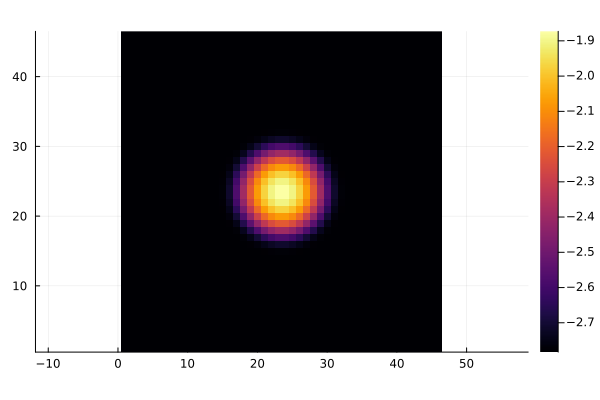

In [43]:
heatmap(initial_data[:,:,23,15], aspectratio=1)

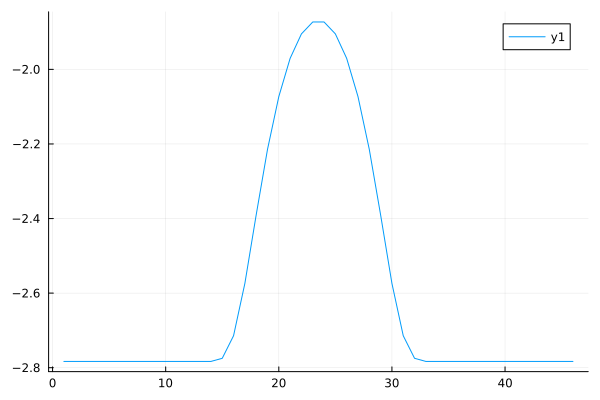

In [44]:
plot(initial_data[:,23,23,15])

In [ ]:
#= wrong dimensions
Adummy = zeros(4,4,4)
Tdummy = zeros(4,4)
A122 = copy(initial_data[:,:,:,1])
for i in 1:N_out+6
    for j in 1:M_out+6
        con_abs = @view initial_data[i,j,:]
        TandA!(Tdummy, Adummy, con_abs, i, j, 3, par_flux)
        A122[i,j] = Adummy[2,3,3]
    end
end
=#

In [45]:
initial_data[5,6,4,1]

0.10000000000000003

In [52]:
du_test = copy(initial_data)
evolution!(du_test,initial_data,(par_inv, par_ev, lengthpars_out),0.2);

In [53]:
Fdummy = zeros(28);
u_dummy = rand(28);



28-element Vector{Float64}:
 0.6208924829474458
 0.25427224200146215
 0.8354516051411331
 0.7845805449817802
 0.287072354489726
 0.20819704264571826
 0.6114610909174503
 0.9864133796034674
 0.9285659306234554
 0.43586922444047915
 0.6228128968178245
 0.12436068605054407
 0.6377206310630258
 ⋮
 0.6435844898159562
 0.4377066819052944
 0.09556838543892032
 0.15062608277574518
 0.6155886106770901
 0.9352910299346009
 0.2946480902788814
 0.07887455160107415
 0.8327054098730535
 0.5362649068549599
 0.3554068159307271
 0.3496031427002203

In [54]:
Fx!(Fdummy, u_dummy, 4, 8, 9, par_flux)[12]

28.749451575548495

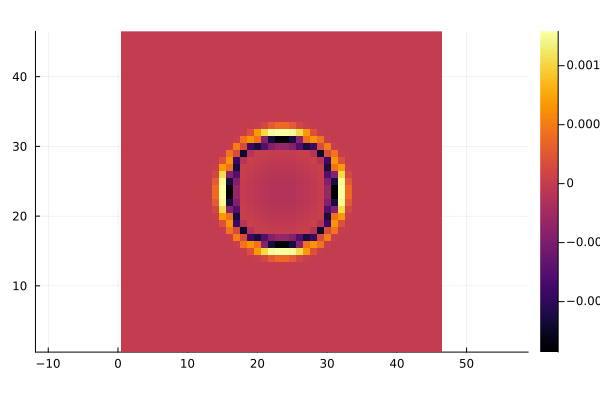

In [55]:
heatmap(du_test[23,:,:,1], aspectratio=1)

In [57]:
tf = 1.0
prob = ODEProblem(evolution!, initial_data, (0.0,tf), (par_inv, par_ev,lengthpars_out));
println("Starting to solve...")
dt = 0.1*dx
sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
println("solved")

Starting to solve...
solved


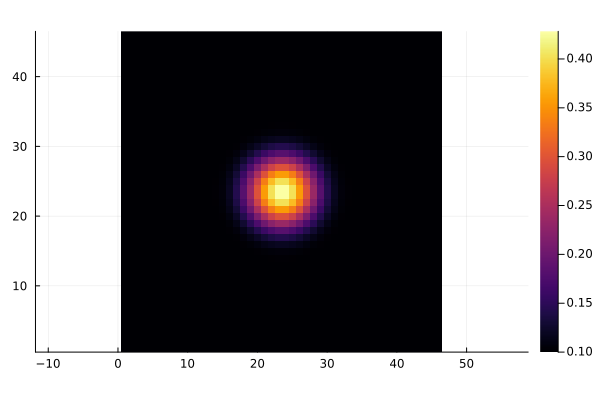

In [58]:
heatmap(sol.u[100][:,:,23,1], aspectratio=1)

In [59]:
anim = @animate for u in sol.u
    heatmap(u[:,:,23,1], clims = (0.0,0.5), aspectratio=1)
end

Animation("/tmp/jl_4BTGZ0", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

[ Info: Saved animation to /content/tmp.gif


Plots.AnimatedGif("/content/tmp.gif")
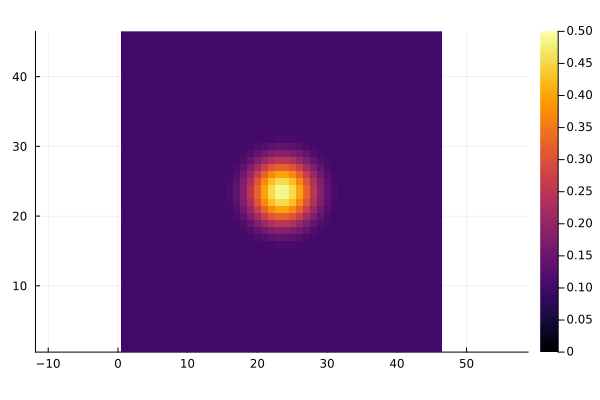

In [60]:
gif(anim)

[ Info: Saved animation to /content/tmp.gif


Plots.AnimatedGif("/content/tmp.gif")
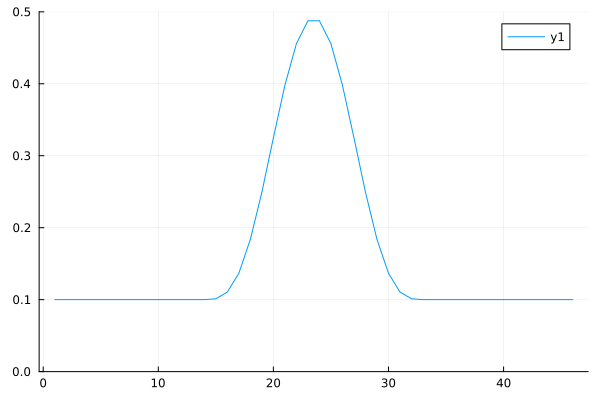

In [65]:
anim_l = @animate for u in sol.u
    plot(u[:,23,23,1], ylims = (0,0.5))
end

gif(anim_l)

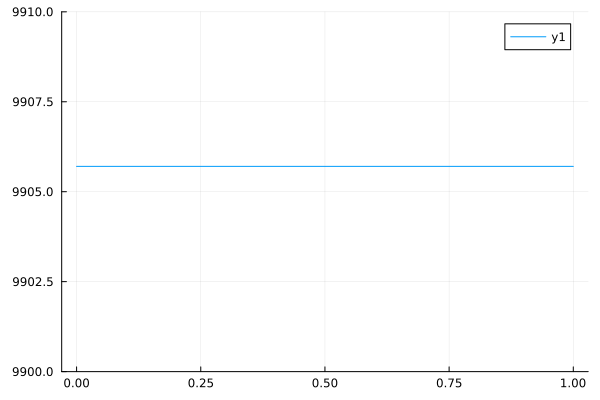

In [62]:
plt = plot()
intlist = []
for t in sol.t
    append!(intlist, sum(sol(t)[:,:,:,1]))
end
plot(sol.t, intlist, ylims = (9.9E3, 9.91E3))

[ Info: Saved animation to /content/Test_energy.gif


Plots.AnimatedGif("/content/Test_energy.gif")
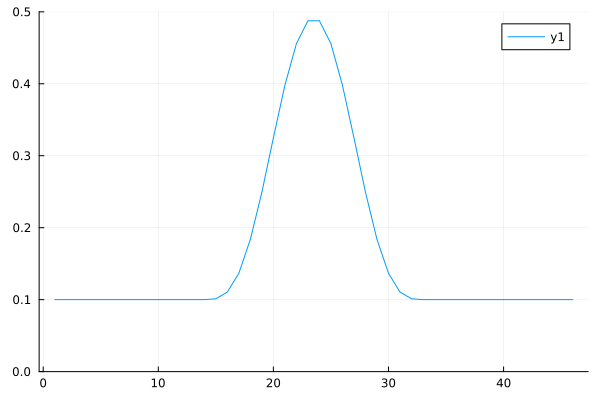

In [67]:
gif(anim, "Test_energy.gif")